# CNN - CIFAR10

### Import Libraries

In [12]:
import time
import numpy as np
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, MaxPool2D
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
K.set_image_data_format("channels_last")

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
from PIL import Image

### Methods Definition

In [14]:
def visualize_cifar10(X_train, y_train, X_test, y_test):
    for i in range(0, 9):  # Create a grid with 3x3 images
        plt.subplot(330 + 1 + i)
        plt.imshow(Image.fromarray(X_train[i]))
    plt.show()


def create_compile_model_cnn_cifar10_simple(num_classes, epochs):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Conv2D(32, (3, 3), activation='relu',padding='same', kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def create_compile_model_cnn_cifar10_plus(num_classes, epochs):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    # Compile model
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


def create_compile_model_cnn_cifar10_plus_plus(num_classes, epochs):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3),activation='relu', padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(BatchNormalization())
    model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model


def create_compile_model_cnn_cifar10_lenet5(num_classes, epochs):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPool2D(strides=2))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    lrate = 0.01
    decay = lrate/epochs
    sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model



def cifar10_using_cnn(mode, X_train, y_train, X_test, y_test):

    # X_train = (50000, 32, 32, 3)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    # Normalize inputs from 0-255 to 0.0-1.0
    X_train = X_train / 255.0
    X_test = X_test / 255.0

    # Transform the label which is an integer into binary categories
    # The value becomes that corresponding to the position, class 5 becomes the list [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    num_classes = y_test.shape[1]
    
    # Data Augmentation
    if augmentation == True:
        datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
        datagen.fit(X_train)

    # Define the network topology and compile
    epochs = 15
    if mode == 0:
        model = create_compile_model_cnn_cifar10_simple(num_classes, epochs)
        print_model(model, "model_cifar10_cnn_simple.png")
    elif mode == 1:
        model = create_compile_model_cnn_cifar10_plus(num_classes, epochs)
        print_model(model, "model_cifar10_cnn_plus.png")
    elif mode == 2:
        model = create_compile_model_cnn_cifar10_plus_plus(num_classes, epochs)
        print_model(model, "model_cifar10_cnn_plus_plus.png")
    elif mode == 3:
        model = create_compile_model_cnn_cifar10_lenet5(num_classes, epochs)
        print_model(model, "model_cifar10_cnn_lenet5.png")

    #print(model.summary())
    plotlosses = PlotLossesKeras()
  
    # Training the network
    if augmentation == True:
        history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100), steps_per_epoch=len(X_train)/100, 
                            epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=[PlotLossesKeras()])
    else:
        history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=100, verbose=1, callbacks=[PlotLossesKeras()])

    #print_history_accuracy(history)
    #print_history_loss(history)

    # Final evaluation with the test cases
    scores = model.evaluate(X_test, y_test, verbose=0)
    #print('Scores: ', scores)
    if mode == 0:
        print("CNN model accuracy CIFAR10 simple: %.2f%%" % (scores[1]*100))
        print("CNN model loss CIFAR10 simple: %.3f" % (scores[0]))
    elif mode == 1:
        print("CNN model accuracy CIFAR10 plus: %.2f%%" % (scores[1]*100))
        print("CNN model loss CIFAR10 plus: %.3f" % (scores[0]))
    elif mode == 2:
        print("CNN model accuracy CIFAR10 plus plus: %.2f%%" % (scores[1]*100))
        print("CNN model loss CIFAR10 plus plus: %.3f" % (scores[0]))
    elif mode == 3:
        print("CNN model accuracy CIFAR10 lenet5: %.2f%%" % (scores[1]*100))
        print("CNN model loss CIFAR10 lenet5: %.3f" % (scores[0]))
        

# Useful to visualize the tipology of the network in pdf or png
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)


# Utils to visualize the history of the learning
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Load Data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Visualize Data

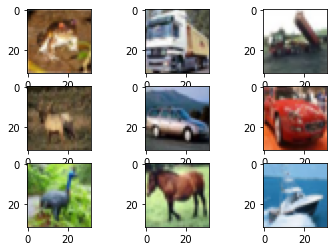

In [4]:
visualize_cifar10(x_train, y_train, x_test, y_test)

### Model Execution

**augmentation: True or False**

**mode: 0 -> simple; 1 -> plus; 2 -> plusplus; 3 -> lenet5;**

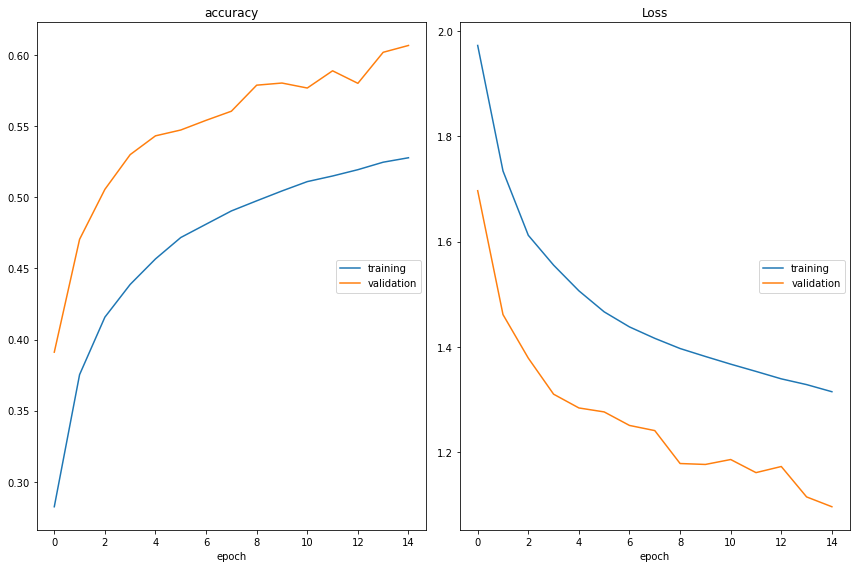

accuracy
	training         	 (min:    0.282, max:    0.528, cur:    0.528)
	validation       	 (min:    0.391, max:    0.607, cur:    0.607)
Loss
	training         	 (min:    1.315, max:    1.972, cur:    1.315)
	validation       	 (min:    1.097, max:    1.696, cur:    1.097)
CNN model accuracy CIFAR10 simple: 60.66%
CNN model loss CIFAR10 simple: 1.097
Processing Time: 2059.436 seconds


In [5]:
mode = 0
augmentation = True
start_time = time.time()
cifar10_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

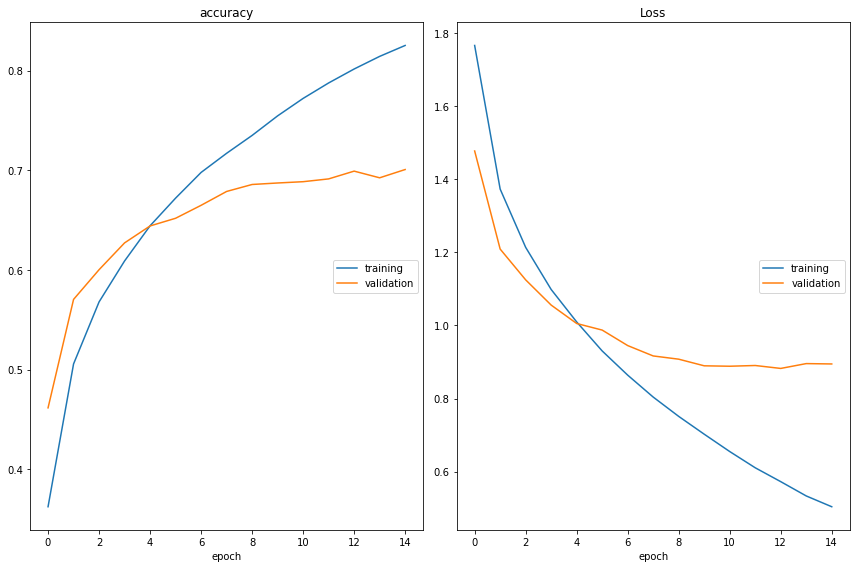

accuracy
	training         	 (min:    0.362, max:    0.825, cur:    0.825)
	validation       	 (min:    0.462, max:    0.701, cur:    0.701)
Loss
	training         	 (min:    0.504, max:    1.766, cur:    0.504)
	validation       	 (min:    0.882, max:    1.477, cur:    0.895)
CNN model accuracy CIFAR10 simple: 70.07%
CNN model loss CIFAR10 simple: 0.895
Processing Time: 2094.202 seconds


In [6]:
mode = 0
augmentation = False
start_time = time.time()
cifar10_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

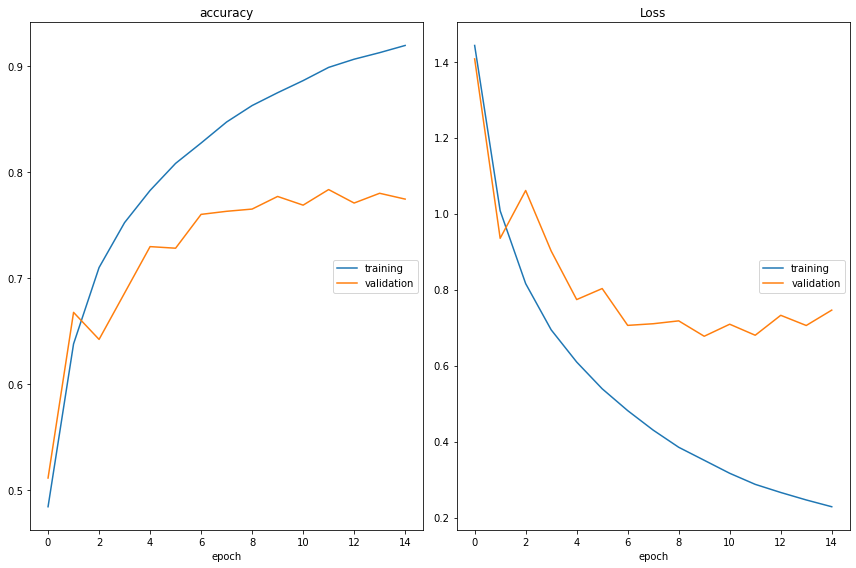

accuracy
	training         	 (min:    0.485, max:    0.919, cur:    0.919)
	validation       	 (min:    0.512, max:    0.784, cur:    0.775)
Loss
	training         	 (min:    0.229, max:    1.443, cur:    0.229)
	validation       	 (min:    0.677, max:    1.407, cur:    0.746)
CNN model accuracy CIFAR10 plus: 77.46%
CNN model loss CIFAR10 plus: 0.746
Processing Time: 3297.389 seconds


In [7]:
mode = 1
augmentation = False
start_time = time.time()
cifar10_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

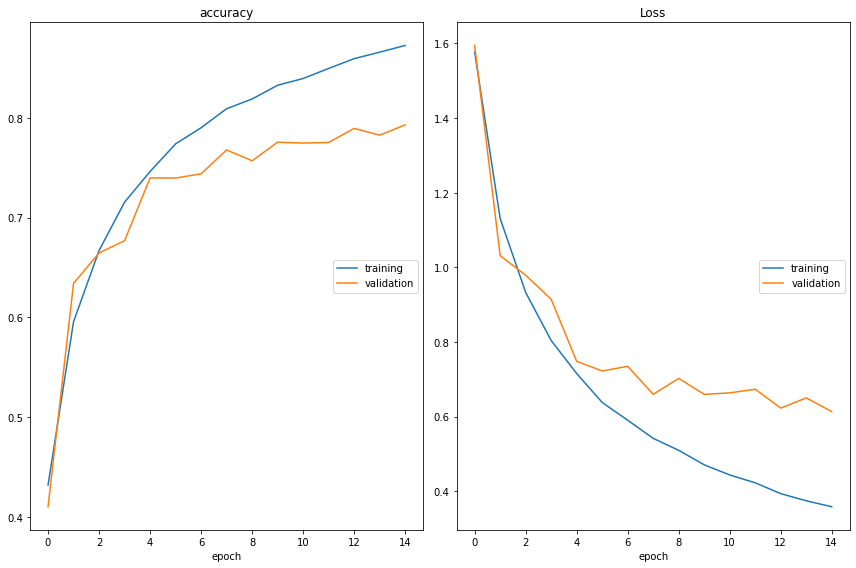

accuracy
	training         	 (min:    0.432, max:    0.872, cur:    0.872)
	validation       	 (min:    0.410, max:    0.793, cur:    0.793)
Loss
	training         	 (min:    0.359, max:    1.577, cur:    0.359)
	validation       	 (min:    0.613, max:    1.595, cur:    0.613)
CNN model accuracy CIFAR10 plus plus: 79.29%
CNN model loss CIFAR10 plus plus: 0.613
Processing Time: 4035.803 seconds


In [8]:
mode = 2
augmentation = False
start_time = time.time()
cifar10_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))

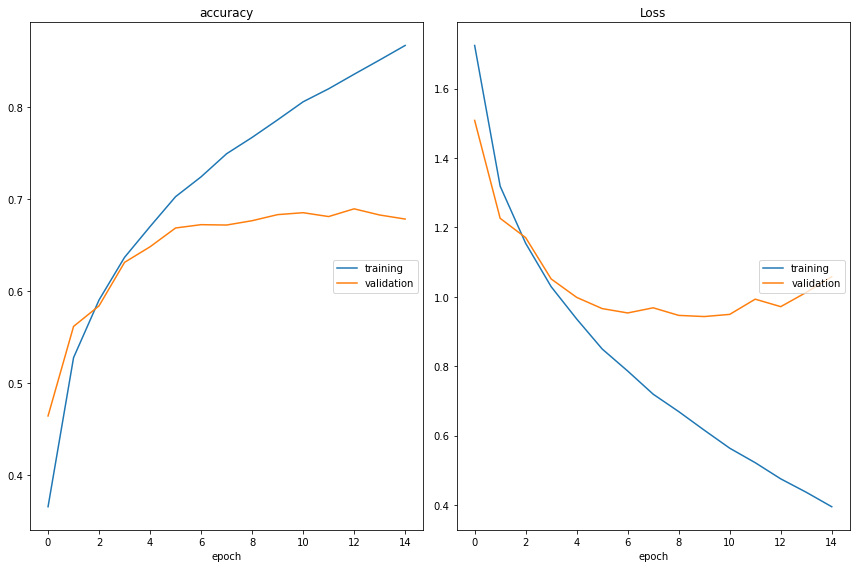

accuracy
	training         	 (min:    0.366, max:    0.867, cur:    0.867)
	validation       	 (min:    0.464, max:    0.689, cur:    0.678)
Loss
	training         	 (min:    0.395, max:    1.724, cur:    0.395)
	validation       	 (min:    0.943, max:    1.508, cur:    1.058)
CNN model accuracy CIFAR10 lenet5: 67.80%
CNN model loss CIFAR10 lenet5: 1.058
Processing Time: 1083.344 seconds


In [15]:
mode = 3
augmentation = False
start_time = time.time()
cifar10_using_cnn(mode, x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))